In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""
Process Monsoon logs generated with this command:
(grep -E '^Convolved .* tess files|^running command' ./log/tconvolve*; du -s ./tmp/*) > summary{job}.log
"""

job = "19456853"
p = "/common/contrib/classroom/ast520/tess_batman/data"
data = {'sector': [],
        'start': [],
        'end': [],
        'completed': [],
        'total': []}
dsizes = {}
with open(p+"/summary{}.log".format(job)) as f:
    for line in f:
        l = line.strip().split()
        if 'python' in l:
            sector, start, end = map(int,l[6:9])
            data['sector'].append(sector)
            data['start'].append(start)
            data['end'].append(end)
        elif 'curves' in l:
            # get number of tess curves completed per run
            completed, total = map(int, l[1].split("/"))
            data['completed'].append(completed)
            data['total'].append(total)
        else:
            # get sizes of tmp directories written
            dir_size = int(l[0])  # KB
            sector = l[1].split('/')[-1]
            dsizes[sector] = dir_size
                
with open(p+"/jobstats.log") as f:
    stats = f.readlines()

Summary of files per sector:
        completed  total
sector                  
1           15652  15884
2           15760  15990
3           15748  15990
4           19674  19988
5           19807  19996
6           19795  19994
7           19821  19995

All sectors:
completed    126257
total        127837
errored        1580


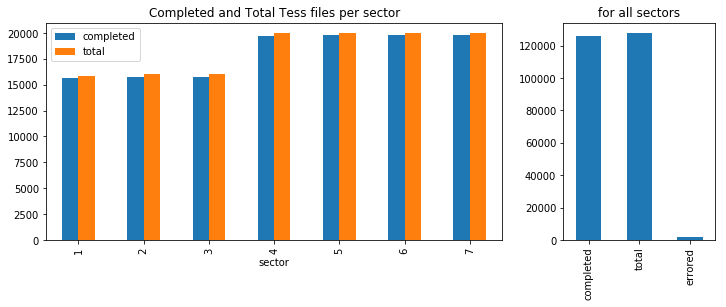

In [3]:
df = pd.DataFrame(data)
sector_group = df.groupby(['sector'])['completed', 'total'].sum()
total_group = sector_group.sum()
total_group['errored'] = total_group['total'] - total_group['completed']
print("Summary of files per sector:")
print(sector_group.to_string())
print("\nAll sectors:")
print(total_group.to_string())


# plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4),gridspec_kw = {'width_ratios':[3, 1]})
sector_group.plot(ax=axs[0], kind='bar', title='Completed and Total Tess files per sector')
total_group.plot(ax=axs[1], kind='bar', title='for all sectors')

Text(0.5, 1.0, 'Sizes of output data directories in MB')

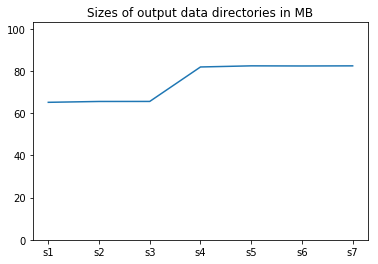

In [4]:
sectors = dsizes.keys()
dir_sizes = np.array(list(dsizes.values()))/1000  # convert to MB

plt.plot(sectors, dir_sizes)
plt.ylim((0,1.25*max(dir_sizes)))
plt.title("Sizes of output data directories in MB")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff45ef91c50>,
      dtype=object)

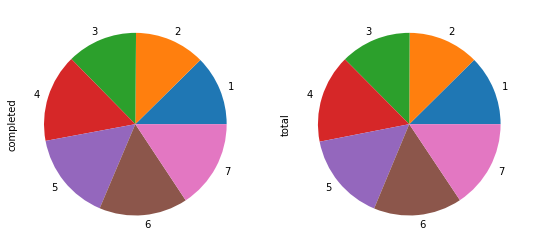

In [5]:
sector_group.plot.pie(subplots=True, figsize=(9,5), legend=False)

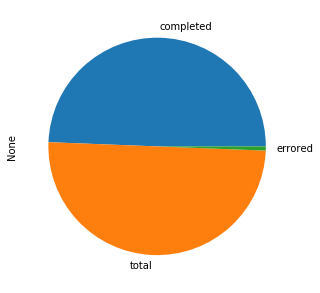

In [6]:
total_group.plot.pie(figsize=(9,5), legend=False)

In [7]:
'''
Parse jobstats file made with following command
jobstats -p -u cjt347 > jobstats{job}.log
'''
stats = pd.read_csv(p+"/jobstats{}.log".format(job), sep="|", engine='python',skipfooter=1)
# Get only completed runs and sort by elapsed time
stats[stats['State'] == 'COMPLETED'].sort_values('Elapsed', ascending=False).head(len(stats))

,JobID,JobName,ReqMem,MaxRSS,ReqCPUS,UserCPU,Timelimit,Elapsed,State,JobEff
44,19456856_3,TESS_Convolve,2000M,83.19M,1,05:47:13,08:00:00,05:55:08,COMPLETED,39.07
49,19456857_2,TESS_Convolve,2000M,82.58M,1,05:20:01,08:00:00,05:23:41,COMPLETED,35.78
31,19456854_2,TESS_Convolve,2000M,83.23M,1,05:19:09,08:00:00,05:23:29,COMPLETED,35.78
32,19456854_3,TESS_Convolve,2000M,84.65M,1,05:17:31,08:00:00,05:21:52,COMPLETED,35.64
43,19456856_2,TESS_Convolve,2000M,83.19M,1,05:17:13,08:00:00,05:21:23,COMPLETED,35.56
26,19456853_3,TESS_Convolve,2000M,83.31M,1,05:14:43,08:00:00,05:20:20,COMPLETED,35.45
37,19456855_2,TESS_Convolve,2000M,82.47M,1,05:15:50,08:00:00,05:19:41,COMPLETED,35.36
50,19456857_3,TESS_Convolve,2000M,84.90M,1,05:15:49,08:00:00,05:19:20,COMPLETED,35.39
38,19456855_3,TESS_Convolve,2000M,84.66M,1,05:15:45,08:00:00,05:19:12,COMPLETED,35.37
25,19456853_2,TESS_Convolve,2000M,84.62M,1,05:15:19,08:00:00,05:18:35,COMPLETED,35.3
